In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0) # Keep it consistent

In [4]:
sns.set_style("whitegrid")
%matplotlib inline

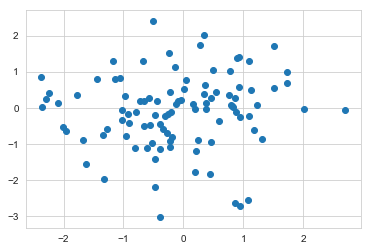

In [7]:
# Get random data 
x_inital = np.random.randn(100,2)
plt.scatter(x_inital[:,0], x_inital[:,1])

In [10]:
# Get a new point ! 
x_new = np.random.randn(1,2)
# Create the updated data set 
x = np.zeros((101,2))
x[0:100,:] = x_inital
x[100:,:] = x_new

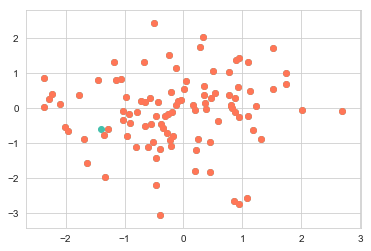

In [11]:
# plot the updated data set
plt.scatter(x[:,0], x[:,1], c="#43c0ac")
plt.scatter(x_inital[:,0], x_inital[:,1], c="#ff7657")

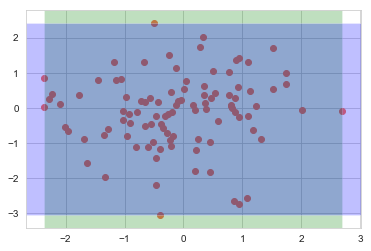

In [42]:
# Generate the bounding box
# Note that the box is first generated based on the inital data
B_s = np.zeros((x.shape[1],2))# [min, max] of dx2
B_s[:,0] = np.min(x_inital, axis=0) # min of column x_inital
B_s[:,1] = np.max(x_inital, axis=0) # max of column x_inital 
plt.axvspan(B_s[0,0], B_s[0,1], facecolor='g', alpha=0.25)
plt.axhspan(B_s[1,0], B_s[1,1], facecolor='b', alpha=0.25)
plt.scatter(x_inital[:,0], x_inital[:,1], c="#ff7657")

In [54]:
# Update the bounding box based on the internal point
# This is stupid ! why not just do it in the above.
B_s[:,0] = np.minimum(B_s[:,0], x_new) # compare element wise 
B_s[:,1] = np.maximum(B_s[:,1], x_new)

In [67]:
# Find r 
temp_sum = sum(B_s[:,1]-B_s[:,0])
r = np.random.choice(np.linspace(0, temp_sum, int(temp_sum*10)), 1)[0]
print(r)

2.6311019230334645


In [71]:
# Identify the cut.
temp_diff = B_s[:,1]-B_s[:,0]
obj = np.cumsum(temp_diff)

In [78]:
j = 9999
for i in range(0,len(obj)):
    if obj[i] >= r:
        j = i
        break

In [80]:
cut = B_s[j,0] + obj[j] - r

In [81]:
cut

0.06512212953011476

In [83]:
def InsertPoint_cut(S ,p):
    """
    Generates the cut dimension and cut value 
    based on the Insertpoint algorithm 
    ---- 
    Inputs:
    S : Set of point to be split (numpy array (n x d))
    p : New point to be inserted (numpy array (1 x d))
    
    Returs:
    dimenstion for cut, cut value 
    ----
    Example:
    InsertPoint_cut(x_inital, x_new)
    (0, 0.9758881798109296)
    """
    # Generate the bounding box
    
    # Note that the box is first generated based on the inital data
    B_s = np.zeros((S.shape[1],2))# [min, max] of dx2
    B_s[:,0] = np.min(S, axis=0) # min of column x_inital
    B_s[:,1] = np.max(S, axis=0) # max of column x_inital 
    
    # Update the bounding box based on the internal point
    
    # This is stupid ! why not just do it in the above.
    B_s[:,0] = np.minimum(B_s[:,0], p) # compare element wise 
    B_s[:,1] = np.maximum(B_s[:,1], p)
    
    # Find r 
    temp_sum = sum(B_s[:,1]-B_s[:,0])
    # resolution of r increases as the r magnitude increases, 10 times for now.
    temp_len = np.linspace(0, temp_sum, int(temp_sum*10)) 
    r = np.random.choice(temp_len, 1)[0] # returns a float.
    
    # Identify the cut.
    temp_diff = B_s[:,1]-B_s[:,0]
    obj = np.cumsum(temp_diff)
    
    cut_dimenstion = 9999 # Hope we do not have 999 dimentional data
    for i in range(0,len(obj)):
        if obj[i] >= r:
            cut_dimenstion = i
            break
            
    cut = B_s[j,0] + obj[j] - r
    
    return cut_dimenstion, cut

In [87]:
InsertPoint_cut(x_inital, x_new)

(0, 0.9758881798109296)